In [13]:
import numpy as np

def AuAgAlloyDielectricModel(GMF):
    # DielectricModel computes the dielectric function of a Gold-Silver alloy
    # with gold molar fraction equal to GMF, according to the presented model.
    # GMF takes values between 0 (pure silver) and 1 (pure gold).
    # Example: Lambda, AuAg5050 = DielectricModel(0.5);
    c = 2.99792458e17  # Speed of light, in nm/s
    h = 4.135667516e-15  # Planck's constant, in eV.s
    Lambda = np.arange(270, 1201, dtype=np.float64)  # In nm
    omega = h*c/Lambda  # In eV
    ModelParameters = np.array([[8.9234,8.5546,9.0218],  # wp
                                [0.042389,0.022427,0.16713],  # gammap
                                [2.2715,1.7381,2.2838],  # einf
                                [2.6652,4.0575,3.0209],  # wg1
                                [2.3957,3.9260,2.7976],  # w01
                                [0.17880,0.017723,0.18833],  # gamma1
                                [73.251,51.217,22.996],  # A1
                                [3.5362,4.1655,3.3400],  # w02
                                [0.35467,0.18819,0.68309],  # gamma2
                                [40.007,30.770,57.540]], dtype=np.float64)  # A2

    wp = GMF**2*(2*ModelParameters[0,0] - 4*ModelParameters[0,2] + 2*ModelParameters[0,1]) \
        + GMF*(-ModelParameters[0,0] + 4*ModelParameters[0,2] - 3*ModelParameters[0,1]) \
        + ModelParameters[0,1]

    gammap = GMF**2*(2*ModelParameters[1,0] - 4*ModelParameters[1,2] + 2*ModelParameters[1,1]) \
            + GMF*(-ModelParameters[1,0] + 4*ModelParameters[1,2] - 3*ModelParameters[1,1]) \
            + ModelParameters[1,1]
    
    einf = GMF**2*(2*ModelParameters[2,0] - 4*ModelParameters[2,2] + 2*ModelParameters[2,1]) \
          + GMF*(-ModelParameters[2,0] + 4*ModelParameters[2,2] - 3*ModelParameters[2,1]) \
          + ModelParameters[2,1]
    
    wg1 = GMF**2*(2*ModelParameters[3,0] - 4*ModelParameters[3,2] + 2*ModelParameters[3,1]) \
         + GMF*(-ModelParameters[3,0] + 4*ModelParameters[3,2] - 3*ModelParameters[3,1]) \
         + ModelParameters[3,1]
    
    w01 = GMF**2*(2*ModelParameters[4,0] - 4*ModelParameters[4,2] + 2*ModelParameters[4,1]) \
         + GMF*(-ModelParameters[4,0] + 4*ModelParameters[4,2] - 3*ModelParameters[4,1]) \
         + ModelParameters[4,1]
    
    gamma1 = GMF**2*(2*ModelParameters[5,0] - 4*ModelParameters[5,2] + 2*ModelParameters[5,1]) \
            + GMF*(-ModelParameters[5,0] + 4*ModelParameters[5,2] - 3*ModelParameters[5,1]) \
            + ModelParameters[5,1]
    
    A1 = GMF**2*(2*ModelParameters[6,0] - 4*ModelParameters[6,2] + 2*ModelParameters[6,1]) \
        + GMF*(-ModelParameters[6,0] + 4*ModelParameters[6,2] - 3*ModelParameters[6,1]) \
        + ModelParameters[6,1]
    
    w02 = GMF**2*(2*ModelParameters[7,0] - 4*ModelParameters[7,2] + 2*ModelParameters[7,1]) \
         + GMF*(-ModelParameters[7,0] + 4*ModelParameters[7,2] - 3*ModelParameters[7,1]) \
         + ModelParameters[7,1]
    
    gamma2 = GMF**2*(2*ModelParameters[8,0] - 4*ModelParameters[8,2] + 2*ModelParameters[8,1]) \
            + GMF*(-ModelParameters[8,0] + 4*ModelParameters[8,2] - 3*ModelParameters[8,1]) \
            + ModelParameters[8,1]
    
    A2 = GMF**2*(2*ModelParameters[9,0] - 4*ModelParameters[9,2] + 2*ModelParameters[9,1]) \
        + GMF*(-ModelParameters[9,0] + 4*ModelParameters[9,2] - 3*ModelParameters[9,1]) \
        + ModelParameters[9,1]
    
    Drude = einf - (wp**2 / ((omega**2) + 1j*gammap*omega))
    
    CP1 = A1*((1/((omega+1j*gamma1)**2)) * (-np.sqrt(omega+1j*gamma1 - wg1)*np.arctan(np.sqrt((wg1-w01)/(omega+1j*gamma1 - wg1)))) 
            + (1/((omega+1j*gamma1)**2)) * (-np.sqrt(omega+1j*gamma1 + wg1)*np.arctanh(np.sqrt((wg1 - w01)/(omega+1j*gamma1 + wg1)))) 
            + (1/((omega+1j*gamma1)**2)) * (2*np.sqrt(wg1)*np.arctanh(np.sqrt((wg1 - w01)/wg1))) 
            - np.sqrt(wg1 - w01)*np.log(1 - ((omega + 1j*gamma1)/w01)**2) / (2*(omega + 1j*gamma1)**2))

    CP2 = - A2 * np.log(1 - ((omega + 1j*gamma2)/w02)**2) / (2*(omega + 1j*gamma2)**2)

    print(f'CP1 is {CP1}')
    #print(f'CP2 is {CP2}')
    #print(f'Drude is {Drude}')
    DielectricFunction = Drude + CP1 + CP2
    return Lambda, DielectricFunction  # Make sure to define and calculate DielectricFunction


In [16]:
AuAgAlloyDielectricModel(0.5)

CP1 is [-2.99190047e-02+0.77740717j -2.67063284e-02+0.78259047j
 -2.34401507e-02+0.78778001j -2.01199387e-02+0.79297548j
 -1.67451523e-02+0.79817659j -1.33152442e-02+0.80338304j
 -9.82965921e-03+0.80859452j -6.28783470e-03+0.81381071j
 -2.68919995e-03+0.81903128j  9.66823803e-04+0.8242559j
  4.68082359e-03+0.82948424j  8.45339489e-03+0.83471594j
  1.22851418e-02+0.83995064j  1.61766773e-02+0.84518799j
  2.01286234e-02+0.8504276j   2.41416112e-02+0.85566909j
  2.82162815e-02+0.86091207j  3.23532845e-02+0.86615614j
  3.65532804e-02+0.87140088j  4.08169395e-02+0.87664587j
  4.51449424e-02+0.88189067j  4.95379802e-02+0.88713485j
  5.39967549e-02+0.89237793j  5.85219795e-02+0.89761946j
  6.31143783e-02+0.90285895j  6.77746871e-02+0.90809591j
  7.25036537e-02+0.91332982j  7.73020377e-02+0.91856017j
  8.21706113e-02+0.92378643j  8.71101592e-02+0.92900803j
  9.21214792e-02+0.93422441j  9.72053822e-02+0.939435j
  1.02362693e-01+0.94463919j  1.07594249e-01+0.94983636j
  1.12900904e-01+0.95502589

(array([ 270.,  271.,  272.,  273.,  274.,  275.,  276.,  277.,  278.,
         279.,  280.,  281.,  282.,  283.,  284.,  285.,  286.,  287.,
         288.,  289.,  290.,  291.,  292.,  293.,  294.,  295.,  296.,
         297.,  298.,  299.,  300.,  301.,  302.,  303.,  304.,  305.,
         306.,  307.,  308.,  309.,  310.,  311.,  312.,  313.,  314.,
         315.,  316.,  317.,  318.,  319.,  320.,  321.,  322.,  323.,
         324.,  325.,  326.,  327.,  328.,  329.,  330.,  331.,  332.,
         333.,  334.,  335.,  336.,  337.,  338.,  339.,  340.,  341.,
         342.,  343.,  344.,  345.,  346.,  347.,  348.,  349.,  350.,
         351.,  352.,  353.,  354.,  355.,  356.,  357.,  358.,  359.,
         360.,  361.,  362.,  363.,  364.,  365.,  366.,  367.,  368.,
         369.,  370.,  371.,  372.,  373.,  374.,  375.,  376.,  377.,
         378.,  379.,  380.,  381.,  382.,  383.,  384.,  385.,  386.,
         387.,  388.,  389.,  390.,  391.,  392.,  393.,  394.,  395.,
      

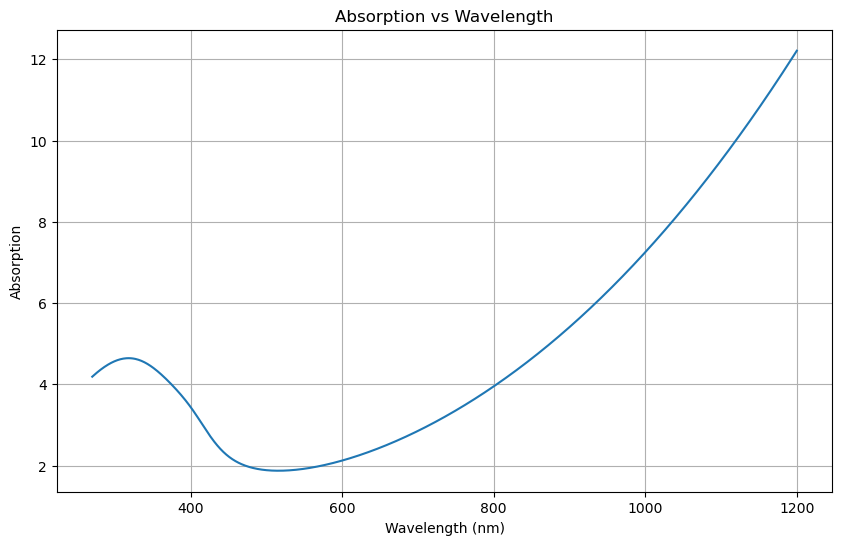

In [6]:
import matplotlib.pyplot as plt

# Call your function and get the DielectricFunction
Lambda, DielectricFunction = AuAgAlloyDielectricModel(.5)

# Absorption is the imaginary part of the Dielectric Function
absorption = DielectricFunction.imag

# Plot
plt.figure(figsize=(10,6))
plt.plot(Lambda, absorption)
plt.title("Absorption vs Wavelength")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
plt.grid(True)
plt.show()


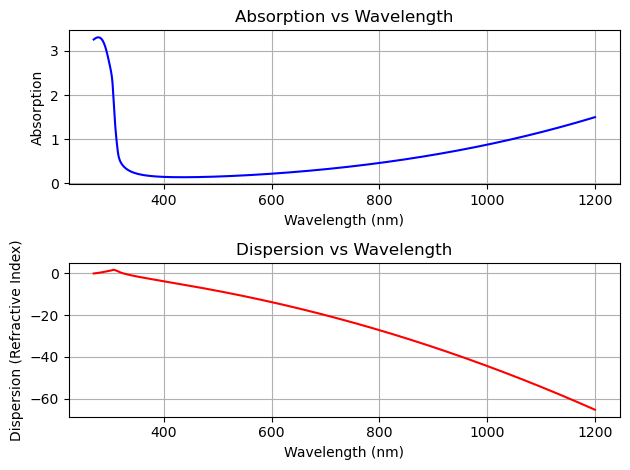

In [9]:
import matplotlib.pyplot as plt

# Call your function and get the DielectricFunction
Lambda, DielectricFunction = AuAgAlloyDielectricModel(0)

# Absorption is the imaginary part of the Dielectric Function
absorption = DielectricFunction.imag

# Dispersion (refractive index) is the real part of the Dielectric Function
dispersion = DielectricFunction.real

# Create subplots
fig, axs = plt.subplots(2)

# Plot Absorption
axs[0].plot(Lambda, absorption, color='blue')
axs[0].set_title("Absorption vs Wavelength")
axs[0].set_xlabel("Wavelength (nm)")
axs[0].set_ylabel("Absorption")
axs[0].grid(True)

# Plot Dispersion
axs[1].plot(Lambda, dispersion, color='red')
axs[1].set_title("Dispersion vs Wavelength")
axs[1].set_xlabel("Wavelength (nm)")
axs[1].set_ylabel("Dispersion (Refractive Index)")
axs[1].grid(True)

# Adjust layout for readability
fig.tight_layout()
plt.show()
